<a href="https://colab.research.google.com/github/RexGod/DataMining_Pgu_Nueral_Network/blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [43]:
classes = ['Malignant' , 'Benign' , 'Normal']

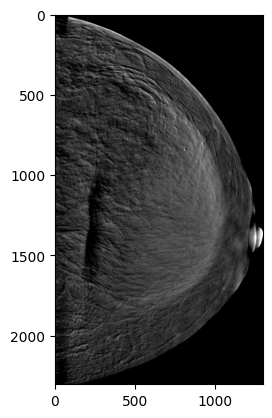

In [47]:
pathImages = '/content/drive/MyDrive/Subtracted_images_of_CDD-CESM'
pathManual = '/content/drive/MyDrive/Radiology_manual_annotations.xlsx'
manualRadio = pd.read_excel(pathManual)
image = plt.imread('/content/drive/MyDrive/Subtracted_images_of_CDD-CESM/P100_L_CM_CC.jpg')
plt.imshow(image)
plt.show()

In [48]:
manualRadio.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,Pathology Classification/ Follow up
0,P1_L_DM_MLO,1,L,DM,46,C,4,Architectural distortion,MLO,"suspicious, distortion",1,Malignant
1,P1_L_CM_MLO,1,L,CESM,46,_,4,Heterogenous non mass enhancement,MLO,"suspicious, non mass",1,Malignant
2,P2_R_DM_CC,2,R,DM,31,C,3$2,Multiple equal density masses$Benign macrocal...,CC,"benign, masses, macrocalcification",2,Benign
3,P2_R_DM_MLO,2,R,DM,31,C,3$2,Multiple equal density masses$Benign macrocalc...,MLO,"benign, masses, macrocalcification",2,Benign
4,P2_R_CM_CC,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,CC,"benign, masses, homogenous",2,Benign


https://www.w3schools.com/python/pandas/pandas_analyzing.asp

In [49]:
manualRadio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Image_name                           2006 non-null   object
 1   Patient_ID                           2006 non-null   int64 
 2   Side                                 2006 non-null   object
 3   Type                                 2006 non-null   object
 4   Age                                  2006 non-null   int64 
 5   Breast density (ACR)                 2006 non-null   object
 6   BIRADS                               2006 non-null   object
 7   Findings                             2006 non-null   object
 8   View                                 2006 non-null   object
 9   Tags                                 2006 non-null   object
 10  Machine                              2006 non-null   int64 
 11  Pathology Classification/ Follow up  2006 n

In [61]:
manualRadio.columns

Index(['Image_name', 'Patient_ID', 'Side', 'Type', 'Age',
       'Breast density (ACR)', 'BIRADS', 'Findings', 'View', 'Tags', 'Machine',
       'Pathology Classification/ Follow up'],
      dtype='object')

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

In [64]:
manualRadio.rename(columns={'Pathology Classification/ Follow up':'classification'})

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,classification
0,P1_L_DM_MLO,1,L,DM,46,C,4,Architectural distortion,MLO,"suspicious, distortion",1,Malignant
1,P1_L_CM_MLO,1,L,CESM,46,_,4,Heterogenous non mass enhancement,MLO,"suspicious, non mass",1,Malignant
2,P2_R_DM_CC,2,R,DM,31,C,3$2,Multiple equal density masses$Benign macrocal...,CC,"benign, masses, macrocalcification",2,Benign
3,P2_R_DM_MLO,2,R,DM,31,C,3$2,Multiple equal density masses$Benign macrocalc...,MLO,"benign, masses, macrocalcification",2,Benign
4,P2_R_CM_CC,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,CC,"benign, masses, homogenous",2,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...
2001,P326_R_CM_MLO,326,R,CESM,51,_,1,No mass or non mass enhancement,MLO,normal,1,Normal
2002,P326_L_DM_CC,326,L,DM,51,C,3,Asymmetrical increased density,CC,asymmetry,1,Malignant
2003,P326_L_DM_MLO,326,L,DM,51,C,3,Asymmetrical increased density,MLO,asymmetry,1,Malignant
2004,P326_L_CM_CC,326,L,CESM,51,_,4,Segmental non mass enhancement,CC,"suspicious non mass, segmental",1,Malignant
